# COCO-QA

This page describes the usage of Dataloader and Datamodule for [COCO-QA](https://www.cs.toronto.edu/~mren/research/imageqa/data/cocoqa/), a VQA dataset based on the COCO Dataset. It was first published in {cite:t}`cocoqa`.

In [1]:
# remove-input
# remove-output
import matplotlib.pyplot as plt
import pathlib
from pprint import pprint
import torch

my_data_path = str(pathlib.Path("").resolve().parent.parent.joinpath("configilm").joinpath("extra").joinpath("mock_data").resolve(strict=True))

/home/lhackel/Documents/development/ConfigVLM/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## COCOQA DataSet

In its most basic form, the `Dataset` only needs the path of the data, if the path is not "./".
The full folder structure expected at this path is
```
.
├── images
│   ├── COCO_train2014_<id a>.jpg
│   ├── COCO_train2014_<id b>.jpg
│   ├── ...
│   ├── COCO_train2014_<id i>.jpg
│   ├── COCO_val2014_<id j>.jpg
│   ├── ...
│   └── COCO_val2014_<id z>.jpg
├── COCO-QA_QA_test.json
└── COCO-QA_QA_train.json
```

In [2]:
from configilm.extra.DataSets import COCOQA_DataSet

ds = COCOQA_DataSet.COCOQADataSet(
    root_dir=my_data_path,  # path to dataset
)

img, question, answer = ds[0]


Loading COCOQA data for None...
        50 QA-pairs indexed
        50 QA-pairs in reduced data set


Size: torch.Size([3, 120, 120])
Question (start): [101, 2054, 2003, 1996, 3609, 1997, 1996, 3933, 102, 0, 0, 0, 0, 0, 0]
Answer (start): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


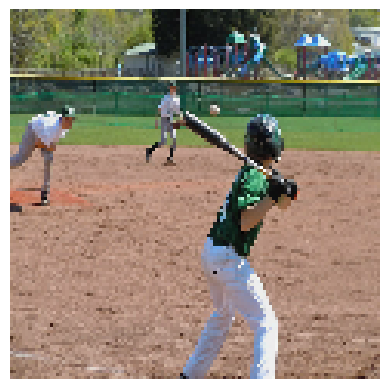

In [3]:
# remove-input
from functools import reduce
print(f"Size: {img.shape}")
print(f"Question (start): {question[:15]}")
print(f"Answer (start): {answer[:15]}")
img = img - min(img.reshape(reduce(lambda x, y: x * y, img.shape)))
img = img / max(img.reshape(reduce(lambda x, y: x * y, img.shape)))
# bring into rgb order
_ = plt.imshow(img.permute(1, 2, 0))
plt.axis('off')
plt.show()

As we can see, this Dataset uses a tokenizer to generate the Question out of a natural language text. If no tokenizer is provided, a default one will be used, however this may lead to bad performance if not accounted for. The tokenizer can be configured as input parameter.

In [4]:
from configilm.ConfigILM import _get_hf_model

tokenizer, _ = _get_hf_model("prajjwal1/bert-tiny")

ds = COCOQA_DataSet.COCOQADataSet(
    root_dir=my_data_path,  # path to dataset
    tokenizer=tokenizer
)
img, question, answer = ds[0]

Loading COCOQA data for None...
        50 QA-pairs indexed
        50 QA-pairs in reduced data set


Other parameters are `split` ("train" or "test"), `transform` for image transformations, `max_img_idx` to limit the number of used images, `img_size`  (channels should be 3, high, width) and `seq_length` of the tokenized question.

In [7]:
tokenizer, _ = _get_hf_model("prajjwal1/bert-tiny")

ds = COCOQA_DataSet.COCOQADataSet(
    root_dir=my_data_path,  # path to dataset
    tokenizer=tokenizer,
    img_size=(3, 200, 100),
    max_img_idx=5,
    seq_length=32,
    transform=None,
    split="train"
)
img, question, answer = ds[0]

Loading COCOQA data for train...
        25 QA-pairs indexed
         5 QA-pairs in reduced data set


Size: torch.Size([3, 200, 100])
Question (start): [101, 3157, 2417, 1012, 2054, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Answer (start): tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


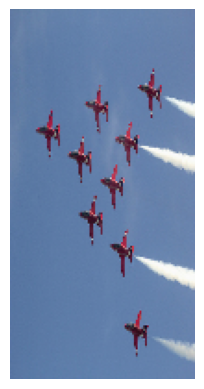

In [8]:
# remove-input
from functools import reduce
print(f"Size: {img.shape}")
print(f"Question (start): {question[:15]}")
print(f"Answer (start): {answer[:15]}")
img = img - min(img.reshape(reduce(lambda x, y: x * y, img.shape)))
img = img / max(img.reshape(reduce(lambda x, y: x * y, img.shape)))
# bring into rgb order
_ = plt.imshow(img.permute(1, 2, 0))
plt.axis('off')
plt.show()